In [2]:
!pip install yfinance pandas numpy matplotlib seaborn scipy



In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Download data
tickers = ['HDFCBANK.NS', 'RELIANCE.NS', 'INFY.NS',
           'HINDUNILVR.NS', 'TATAMOTORS.NS', 'SUNPHARMA.NS', 'LT.NS']

data = yf.download(tickers, start='2021-01-01', end='2024-12-01')

data.head()

/tmp/ipython-input-2423301299.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start='2021-01-01', end='2024-12-01')
[*********************100%***********************]  7 of 7 completed


Price            Close                                                      \
Ticker     HDFCBANK.NS HINDUNILVR.NS      INFY.NS        LT.NS RELIANCE.NS   
Date                                                                         
2021-01-01  674.886353   2195.604004  1109.599609  1230.778198  901.194641   
2021-01-04  670.600342   2231.422607  1134.072632  1247.479736  902.713684   
2021-01-05  675.667725   2253.539062  1138.958496  1239.603516  891.491272   
2021-01-06  672.755127   2222.962158  1128.658691  1246.910278  867.980774   
2021-01-07  670.718750   2178.407471  1111.096436  1270.586426  866.575134   

Price                                        High                             \
Ticker     SUNPHARMA.NS TATAMOTORS.NS HDFCBANK.NS HINDUNILVR.NS      INFY.NS   
Date                                                                           
2021-01-01   566.247314    183.201447  683.387231   2210.731468  1114.045270   
2021-01-04   573.987244    187.916565  681.019274   2234.641226  1135.613192   
2021-01-05   573.085144    189.782944  677.585778   2259.424447  1143.536119   
2021-01-06   574.841980    191.944046  681.966386   2253.033210  1146.177088   
2021-01-07   571.613098    193.270172  678.461899   2237.124144  1142.347810   

Price       ...        Open                                 Volume  \
Ticker      ... RELIANCE.NS SUNPHARMA.NS TATAMOTORS.NS HDFCBANK.NS   
Date        ...                                                      
2021-01-01  ...  901.421320   562.686011    181.678858     8810938   
2021-01-04  ...  904.640758   569.808624    188.407722    15740192   
2021-01-05  ...  892.806192   577.833550    183.790841    14386824   
2021-01-06  ...  891.400457   573.702351    191.010851    22134050   
2021-01-07  ...  870.814696   575.554240    193.515750    19894842   

Price                                                                 \
Ticker     HINDUNILVR.NS   INFY.NS    LT.NS RELIANCE.NS SUNPHARMA.NS   
Date                                                                   
2021-01-01        830096   4253550  2058419    10015175      8229768   
2021-01-04       1614486   7208454  4014636    24513534     11329298   
2021-01-05       2356303   8145280  2833637    24123091      7790158   
2021-01-06       1641627   7161715  4615963    46401468      6422080   
2021-01-07       2403881  10954918  4270598    32325918      4555702   

Price                     
Ticker     TATAMOTORS.NS  
Date                      
2021-01-01      27334421  
2021-01-04      63980597  
2021-01-05      75752593  
2021-01-06      75621947  
2021-01-07      66024848  

[5 rows x 35 columns]

In [7]:
returns = data['Close'].pct_change().dropna()

annual_returns = returns.mean() * 252
cov_matrix = returns.cov() * 252

print("Annual Returns:")
print(annual_returns)

Annual Returns:
Ticker
HDFCBANK.NS      0.096573
HINDUNILVR.NS    0.049880
INFY.NS          0.155802
LT.NS            0.317756
RELIANCE.NS      0.120866
SUNPHARMA.NS     0.319418
TATAMOTORS.NS    0.444754
dtype: float64


In [8]:
num_portfolios = 5000
results = np.zeros((3, num_portfolios))
weights_record = []

for i in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    weights_record.append(weights)

    portfolio_return = np.dot(weights, annual_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = portfolio_return / portfolio_volatility

    results[0,i] = portfolio_return
    results[1,i] = portfolio_volatility
    results[2,i] = sharpe_ratio

results_df = pd.DataFrame(results.T, columns=['Return', 'Risk', 'Sharpe'])

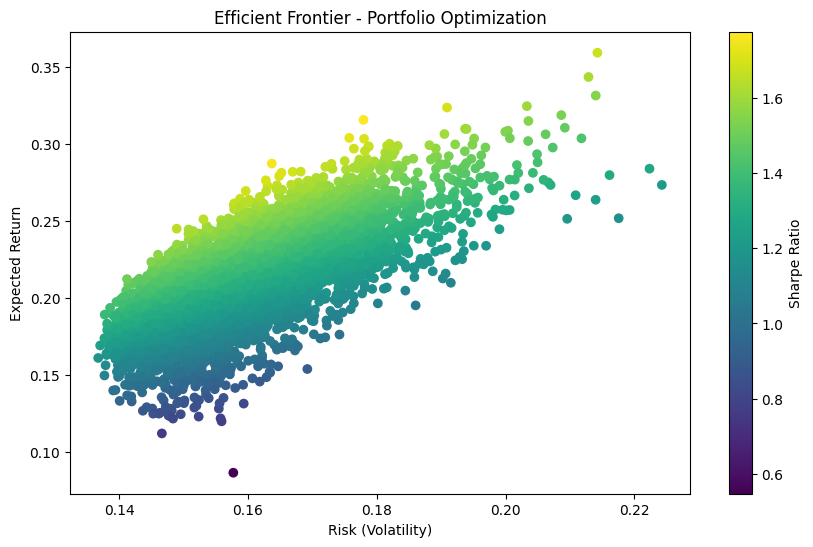

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(results_df['Risk'], results_df['Return'],
            c=results_df['Sharpe'], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Risk (Volatility)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier - Portfolio Optimization')
plt.show()


In [10]:
max_sharpe_idx = results_df['Sharpe'].idxmax()
optimal_weights = weights_record[max_sharpe_idx]

print("Optimal Portfolio Weights:")
for stock, weight in zip(tickers, optimal_weights):
    print(f"{stock}: {weight*100:.2f}%")

print(f"\nExpected Annual Return: {results_df.iloc[max_sharpe_idx,0]*100:.2f}%")
print(f"Expected Volatility: {results_df.iloc[max_sharpe_idx,1]*100:.2f}%")
print(f"Sharpe Ratio: {results_df.iloc[max_sharpe_idx,2]:.2f}")


Optimal Portfolio Weights:
HDFCBANK.NS: 3.13%
RELIANCE.NS: 0.17%
INFY.NS: 6.67%
HINDUNILVR.NS: 19.15%
TATAMOTORS.NS: 4.58%
SUNPHARMA.NS: 47.06%
LT.NS: 19.24%

Expected Annual Return: 31.58%
Expected Volatility: 17.79%
Sharpe Ratio: 1.77
